# Build an SQL ➡️ Pandas Pipeline!

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create in-memory SQLite database
conn = sqlite3.connect(":memory:")

cursor = conn.cursor()

# Create tables
cursor.execute("""
CREATE TABLE products (
    id INTEGER PRIMARY KEY,
    name TEXT,
    category TEXT,
    price REAL
);
""")

cursor.execute("""
CREATE TABLE sales (
    sale_id INTEGER PRIMARY KEY,
    product_id INTEGER,
    quantity INTEGER,
    sale_date TEXT,
    FOREIGN KEY(product_id) REFERENCES products(id)
);
""")

# Insert sample data into products
cursor.executemany("""
INSERT INTO products (id, name, category, price) VALUES (?, ?, ?, ?);
""", [
    (1, "Laptop", "Electronics", 1200),
    (2, "Headphones", "Electronics", 150),
    (3, "Coffee Maker", "Home", 80),
    (4, "Desk Chair", "Furniture", 200)
])

# Insert sample data into sales
cursor.executemany("""
INSERT INTO sales (sale_id, product_id, quantity, sale_date) VALUES (?, ?, ?, ?);
""", [
    (1, 1, 2, "2024-01-03"),
    (2, 2, 5, "2024-01-04"),
    (3, 3, 1, "2024-01-04"),
    (4, 1, 1, "2024-01-05"),
    (5, 4, 3, "2024-01-06")
])

conn.commit()

### Create a Revenue by Category Table

In [24]:
query = "SELECT category, SUM(quantity*price) AS category_revenue FROM sales JOIN products ON sales.product_id = products.id GROUP BY category;"
df_category_revenue = pd.read_sql_query(query, conn)

In [25]:
df_category_revenue

,category,category_revenue
0,Electronics,4350.0
1,Furniture,600.0
2,Home,80.0


### Create a Daily Revenue Table

In [26]:
query2 = "SELECT sale_date, SUM(quantity*price) AS daily_revenue FROM sales JOIN products ON sales.product_id = products.id GROUP BY sale_date ORDER BY sale_date ASC;"
df_daily_revenue = pd.read_sql_query(query2, conn)

In [35]:
df_daily_revenue

,sale_date,daily_revenue
0,2024-01-03,2400.0
1,2024-01-04,830.0
2,2024-01-05,1200.0
3,2024-01-06,600.0


### Plot the Daily Revenue Report (Bar Chart)

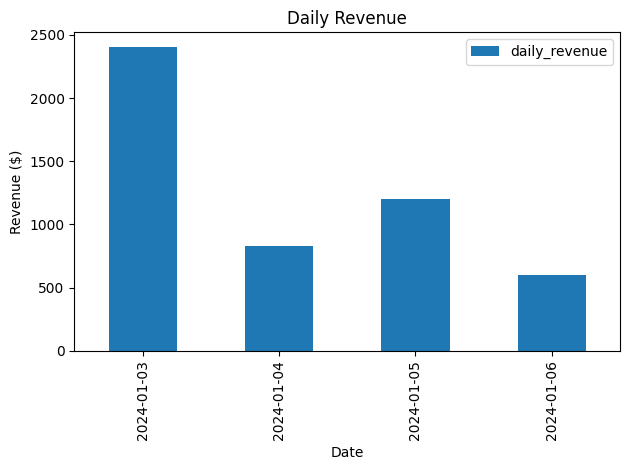

In [31]:
df_daily_revenue.plot(kind='bar', x = 'sale_date', y = 'daily_revenue')
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.tight_layout()

### Export Category Revenue Report as a CSV file

In [32]:
df_category_revenue.to_csv("category_revenue_summary.csv", index=False)